In [854]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ignore warning
import warnings
warnings.filterwarnings('ignore')

In [855]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#load IPL dataset(2008-2019)
-It is clasification model dataset

In [856]:
match = pd.read_csv('/content/matches.csv')
delivery = pd.read_csv('/content/deliveries.csv')

In [857]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [858]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [859]:
#shape of dataset
print("Match data shape:-",match.shape)
print("Delivery data shape:-",delivery.shape)

Match data shape:- (756, 18)
Delivery data shape:- (179078, 21)


##Understanding the data


In [860]:
#data information
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [861]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

#Treating the missing value

In [862]:
# Checking for missing values
missing_values = match.isnull().sum()
print(" Missing Values:\n",missing_values)

 Missing Values:
 id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64


In [863]:
#drop umpire that is not relevent to match
match.drop(['umpire1','umpire2','umpire3'],axis=1,inplace=True)

In [864]:
#check null value row print in city
match[match['city'].isnull()].head(10)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


In [865]:
#all city missing where veneue is dubai so fill nan in Dubai
match['city'].fillna('Dubai',inplace=True)

In [866]:
#check null value row print in winner
match[match['winner'].isnull()].head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,IPL-2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


#Match tied or rain cause match stop/ no result

In [867]:
#Don't drop the null column
#match.dropna(inplace=True)

In [868]:
#fill the null value in winner as Tied
match['winner'].fillna('Tied',inplace=True)
#filled the player of match in none
match['player_of_match'].fillna('None',inplace=True)

In [869]:
# Checking for missing values
missing_values = match.isnull().sum()
print(" Missing Values:\n",missing_values)

 Missing Values:
 id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64


In [870]:
# Checking for missing values
missing_values = delivery.isnull().sum()
print(" Missing Values:\n",missing_values)

 Missing Values:
 match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


In [871]:
delivery.shape

(179078, 21)

In [872]:
#fill the nan dismissed value as notout in 0 and out in 1
delivery['player_dismissed'] = delivery['player_dismissed'].fillna("0")
#using lambda function filled 0 and 1
delivery['player_dismissed'] = delivery['player_dismissed'].apply(lambda x:x if x == "0" else "1")
#convert the player_dismissed column in to int
delivery['player_dismissed'] = delivery['player_dismissed'].astype('int')

In [873]:
#drop dismissed_kind and fielder unnessary column
delivery.drop(['dismissal_kind','fielder'],axis=1,inplace=True)

In [874]:
#check the shape of dataset
delivery.shape

(179078, 19)

In [875]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,0
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,0


#Cleaning dataset

In [876]:
#check the team1 unique
match['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [877]:
#check the team1 unique
match['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [878]:
#check the team1 unique
match['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [879]:
# Define a dictionary for replacements
team_replacements = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Pune Warriors': 'Rising Pune Supergiant',
    'Kings XI Punjab': 'Punjab Kings'
}

# Replace the team names in relevant columns
for column in ['team1', 'team2', 'toss_winner', 'winner']:
    match[column] = match[column].replace(team_replacements)

In [880]:
delivery['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [881]:
delivery['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [882]:
# Define a dictionary for replacements
team_replacements = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Pune Warriors': 'Rising Pune Supergiant',
    'Kings XI Punjab': 'Punjab Kings'
}

# Replace the team names in relevant columns
for column in ['batting_team', 'bowling_team']:
    delivery[column] = delivery[column].replace(team_replacements)

In [883]:
#check the duplicate row
match.duplicated().sum()

0

In [884]:
#  Convert 'date' to datetime format
match['date'] = pd.to_datetime(match['date'], format='%d-%m-%Y')

#save clean dataset

In [885]:
#save cleaned dataset
match.to_csv('cleaned_matches.csv', index=False)
delivery.to_csv('cleaned_deliveries.csv', index=False)

In [886]:
total_score_df =delivery.groupby(['match_id','inning']).sum()['total_runs']

In [887]:
#match_id both inning score in df
total_score_df

match_id  inning
1         1         207
          2         172
2         1         184
          2         187
3         1         183
                   ... 
11413     2         170
11414     1         155
          2         162
11415     1         152
          2         157
Name: total_runs, Length: 1528, dtype: int64

In [888]:
#convert this in df in new index
total_score_df = total_score_df.reset_index()
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [889]:
#1st inning score in total score
total_score_df = total_score_df[total_score_df['inning']==1]

In [890]:
#check the 1st inning data only
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [891]:
#merge total_score_df(1st inning score from delivery)  with match dataset on base of match_id
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [892]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,match_id,total_runs
0,1,IPL-2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1,207
1,2,IPL-2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,2,184
2,3,IPL-2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,3,183
3,4,IPL-2017,Indore,2017-04-08,Rising Pune Supergiant,Punjab Kings,Punjab Kings,field,normal,0,Punjab Kings,0,6,GJ Maxwell,Holkar Cricket Stadium,4,163
4,5,IPL-2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,5,157


#consider the row where team play present IPL teams
-gujurat and lucknow data not avelable

In [893]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [894]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [895]:
#check after drop other team match shape of data
match_df.shape

(641, 17)

In [896]:
#applyed DLS method match or not
match_df['dl_applied'].value_counts()

,count
dl_applied,
0,626
1,15


In [897]:
#remove rain stop no result match dls applied match
match_df = match_df[match_df['dl_applied'] == 0]

In [898]:
#requied column consider other remove as per required
match_df = match_df[['match_id','city','winner','total_runs']]

In [899]:
#merge match_df in to delivery_df as all required column from match add in delivery
delivery_df = match_df.merge(delivery,on='match_id')

In [900]:
#second inning
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [901]:
delivery_df.shape

(72413, 22)

In [902]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,0,0,1,0,1,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,0,0,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,0,0,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,0,0,2,0,2,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,0,0,4,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,0,0,1,0,1,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,0,0,2,0,2,0
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,0,0,1,0,1,1
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,0,0,2,0,2,0


In [903]:
#count the Run ball by ball
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [904]:
#after every ball run substracted from target run
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [905]:
#how many ball left from the 120 balls we take 119 as after first ball
delivery_df['balls_left'] = 119 - (6 * (delivery_df['over']-1) + (delivery_df['ball'] - 1))

In [906]:
#count remaining wicket after eveery fall of wicket from total wicket 10
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum()
wickets=wickets.values
delivery_df['wickets'] = 10 - wickets

In [907]:
#now we need current run rate to of batting team formula crr = runs/overs(reamaing ball)
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [908]:
#now find requied run rate criket run rate is always multiple of 6
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [909]:
#create function  the result in-place 1  if winner column match with the batting team otherwise place 0
def results(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [910]:
#pass the fuction in result as new column created
delivery_df['result'] = delivery_df.apply(results,axis=1)

In [911]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,current_score,runs_left,balls_left,wickets,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,206,119,10,6.000000,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,1,206,118,10,3.000000,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,1,206,117,10,2.000000,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,3,204,116,10,4.500000,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,7,200,115,10,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,152,0,4,5,7.862069,0.000000,0
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,154,-2,3,5,7.897436,-4.000000,0
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,1,155,-3,2,4,7.881356,-9.000000,0
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,157,-5,1,4,7.915966,-30.000000,0


In [912]:
#check the column
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'current_score', 'runs_left', 'balls_left',
       'wickets', 'crr', 'rrr', 'result'],
      dtype='object')

In [913]:
#take all nessary column required make final dataframe  as filter data
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [914]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,5,152,7.862069,0.000000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,5,152,7.897436,-4.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,4,152,7.881356,-9.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-5,1,4,152,7.915966,-30.000000,0


In [915]:
#reshuffle the whole dataset
final_df = final_df.sample(final_df.shape[0])

In [916]:
#check if any null value in it
final_df.isnull().sum()

,0
batting_team,0
bowling_team,0
city,0
runs_left,0
balls_left,0
wickets,0
total_runs_x,0
crr,0
rrr,7
result,0


In [917]:
#print the null value
final_df[final_df['rrr'].isnull()]
#that means rrr is 0 mean then win the match fill it 0

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
143757,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata,0,0,5,219,10.95,NaN,0
105379,Punjab Kings,Rajasthan Royals,Ahmedabad,0,0,4,191,9.55,NaN,1
13655,Chennai Super Kings,Delhi Capitals,Delhi,0,0,4,187,9.35,NaN,1
73506,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,0,0,3,130,6.50,NaN,1
20231,Rajasthan Royals,Chennai Super Kings,Mumbai,0,0,3,163,8.15,NaN,1
75945,Royal Challengers Bangalore,Delhi Capitals,Bangalore,0,0,3,152,7.60,NaN,1
37185,Chennai Super Kings,Punjab Kings,Chennai,0,0,3,136,6.80,NaN,0


In [918]:
#that means rrr is 0 mean then batting team win the match fill it 0
final_df.fillna(0,inplace=True)

In [919]:
#check if any null value in it after treating null value
final_df.isnull().sum()

,0
batting_team,0
bowling_team,0
city,0
runs_left,0
balls_left,0
wickets,0
total_runs_x,0
crr,0
rrr,0
result,0


In [920]:
#shape of final df
final_df.shape

(72413, 10)

In [921]:
final_df.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
count,72413.000000,72413.000000,72413.000000,72413.000000,72413.000000,7.241300e+04,72413.000000
mean,92.258379,62.657078,7.535967,165.583956,7.439523,NaN,0.525624
std,50.021962,33.404593,2.138637,29.282200,2.275850,NaN,0.499346
min,-16.000000,-2.000000,0.000000,65.000000,0.000000,-inf,0.000000
25%,53.000000,35.000000,6.000000,146.000000,6.257143,7.140000e+00,0.000000
50%,92.000000,63.000000,8.000000,165.000000,7.480519,8.877551e+00,1.000000
75%,130.000000,92.000000,9.000000,185.000000,8.682353,1.090909e+01,1.000000
max,249.000000,119.000000,10.000000,250.000000,42.000000,inf,1.000000


In [922]:
# Replace -inf and +inf with 0 in the 'rrr' column
final_df['rrr'].replace([np.inf, -np.inf], 0, inplace=True)

In [923]:
#save the Final dataFrame
final_df.to_csv('final_IPL_df.csv', index=False)

#Spliting the final ipl dataFrame

In [924]:
X = final_df.drop('result', axis=1)  # Dropping the 'result' column to create feature set
y = final_df['result']  # Selecting the 'result' column as the target variable

In [925]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [926]:
#X_train categorical column list
X_train.select_dtypes(include=['object']).columns.tolist()

['batting_team', 'bowling_team', 'city']

In [927]:
#convert categorical column into numerical using one hot encoding with column transform
col_en = ColumnTransformer([
    ('col_en',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [928]:
#pass all data in to pipline
pipe = Pipeline(steps=[
    ('step1',col_en),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [929]:
#fit the pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_en',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [930]:
#predict the data X_test
y_pred = pipe.predict(X_test)

In [931]:
#evaluate prediction check accuracy
accuracy_score(y_test,y_pred)

0.7995581026030518

In [932]:
#predict probality
pipe.predict_proba(X_test)[10]

array([0.0693986, 0.9306014])

#Export the model

In [933]:
import pickle
pickle.dump(pipe,open('pipe_ipl.pkl','wb'))

#FINAL TEST of model by creating data of one match of IPL

#Create simple match data ball by ball then check there win probability

In [934]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [935]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [936]:
#over by over win and lose probability
temp_df,target = match_progression(delivery_df,80,pipe)
temp_df

Target- 165


,end_of_over,runs_after_over,wickets_in_over,lose,win
11927,1,10,0,35.4,64.6
11933,2,6,0,35.3,64.7
11939,3,8,1,46.2,53.8
11945,4,6,0,45.1,54.9
11951,5,6,0,43.9,56.1
11957,6,7,0,41.1,58.9
11963,7,3,1,60.1,39.9
11969,8,7,0,57.3,42.7
11975,9,5,0,57.6,42.4
11981,10,3,0,61.1,38.9


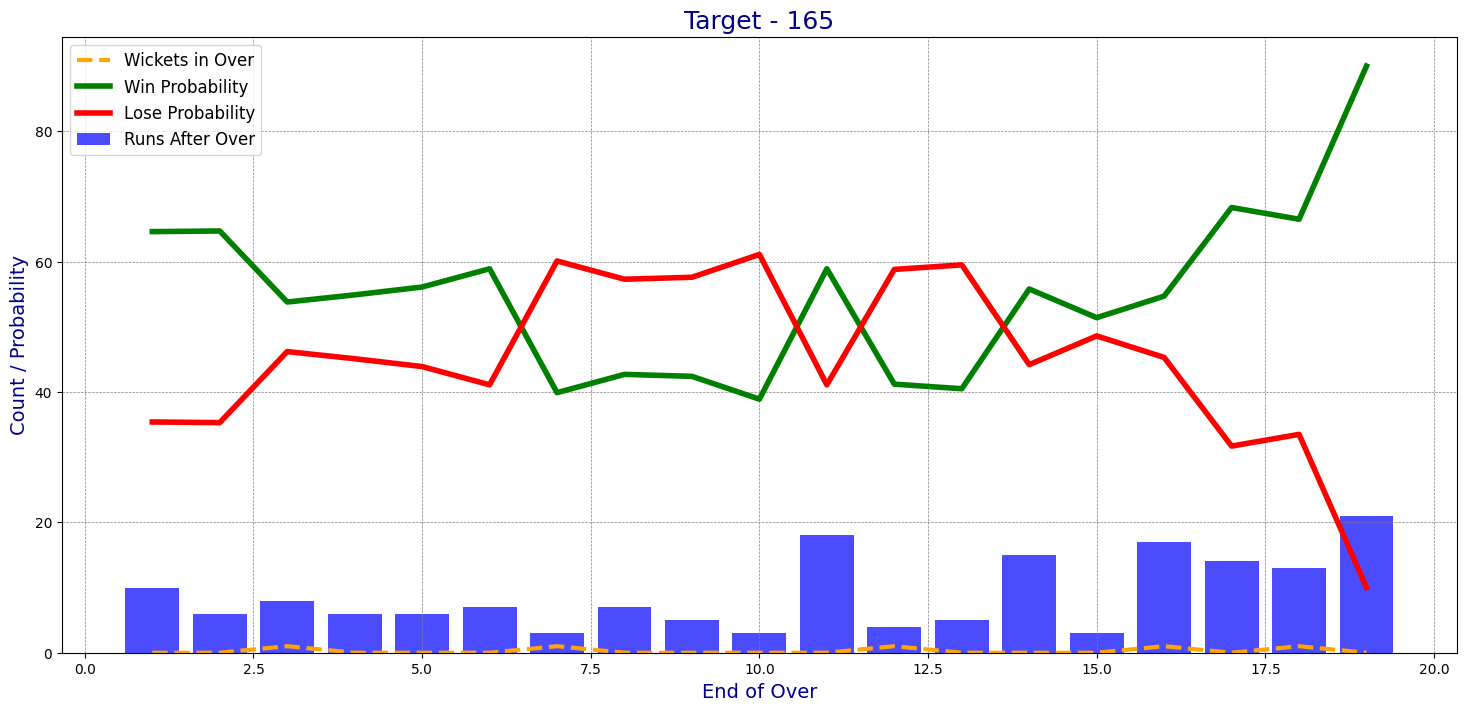

In [937]:
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], color='orange', linewidth=3, linestyle='--', label='Wickets in Over')
plt.plot(temp_df['end_of_over'], temp_df['win'], color='green', linewidth=4, linestyle='-', label='Win Probability')
plt.plot(temp_df['end_of_over'], temp_df['lose'], color='red', linewidth=4, linestyle='-', label='Lose Probability')
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'], color='blue', alpha=0.7, label='Runs After Over')
plt.title(f'Target - {target}', fontsize=18, color='darkblue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='grey')
plt.xlabel('End of Over', fontsize=14, color='darkblue')
plt.ylabel('Count / Probability', fontsize=14, color='darkblue')
plt.legend(fontsize=12, loc='upper left')
plt.show()